# Heart disease prediction


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Load the dataset.
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
# Handle missing values appropriately
df.isnull().values.any()
# df.isnull().values.sum()

False

In [45]:
#Encode categorical variables (e.g., gender) using one-hot encoding.

df.select_dtypes(include='object').columns

Index([], dtype='object')

In [46]:
#Scale numerical features (e.g., age, cholesterol, blood pressure).


In [47]:
#Perform basic exploratory data analysis to understand the distribution of the data and relationships between variables.

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,52.833333,0.766667,1.466667,136.400000,232.133333,0.166667,0.633333,160.366667,0.266667,1.183333,1.533333,0.500000,1.966667,0.800000
std,8.594639,0.430183,1.166585,14.075168,38.690401,0.379049,0.490133,17.391007,0.449776,1.361562,0.730297,0.900192,0.490133,0.406838
min,37.000000,0.000000,0.000000,110.000000,164.000000,0.000000,0.000000,108.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,45.750000,1.000000,0.000000,130.000000,204.500000,0.000000,0.000000,150.500000,0.000000,0.075000,1.000000,0.000000,2.000000,1.000000
50%,53.500000,1.000000,2.000000,140.000000,233.500000,0.000000,1.000000,163.000000,0.000000,0.900000,2.000000,0.000000,2.000000,1.000000
75%,58.750000,1.000000,2.000000,143.750000,246.250000,0.000000,1.000000,174.250000,0.750000,1.500000,2.000000,1.000000,2.000000,1.000000
max,71.000000,1.000000,3.000000,160.000000,354.000000,1.000000,1.000000,187.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


<Axes: >

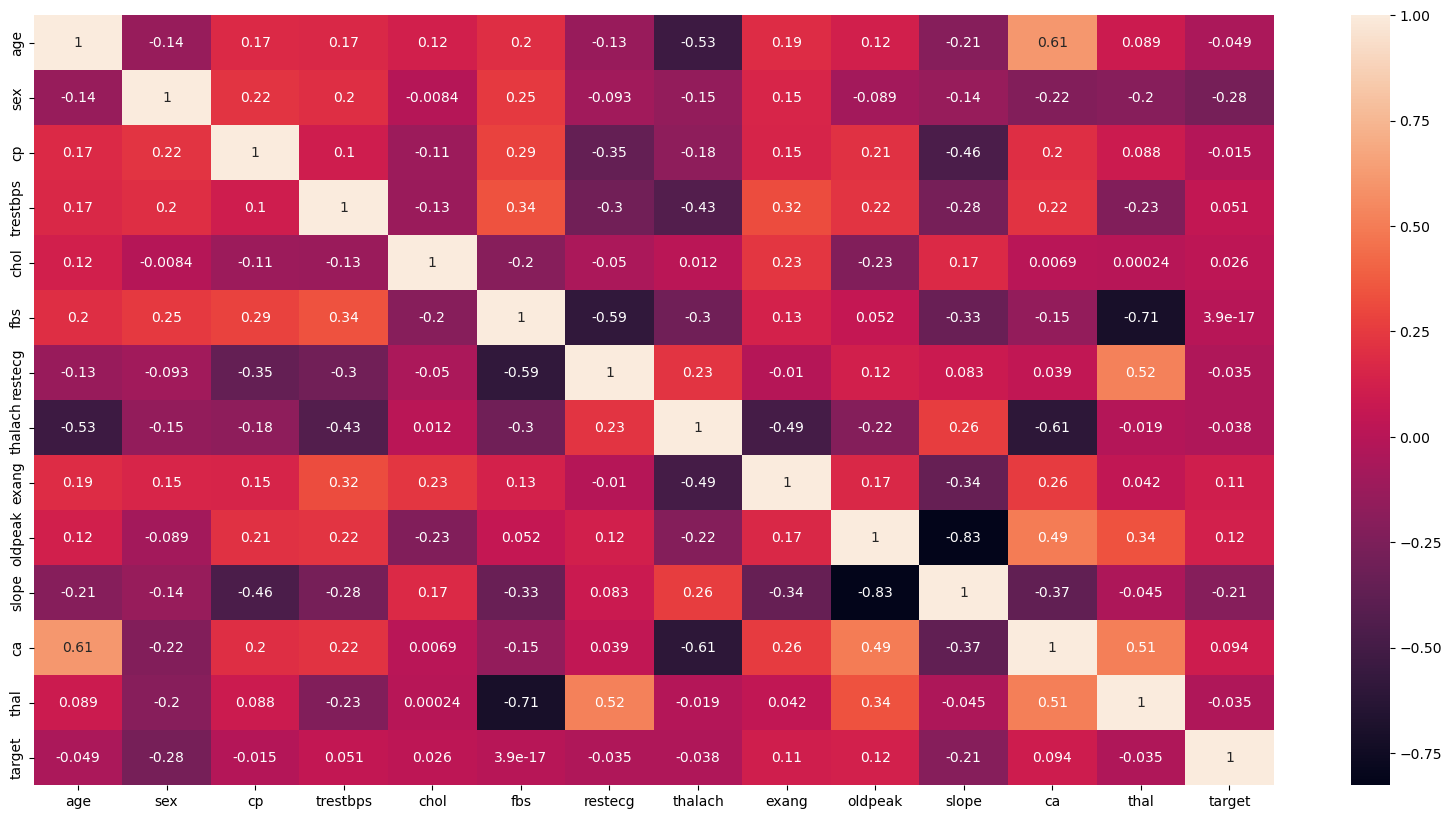

In [48]:
#Visualize correlations between features and the target variable (presence or absence of heart disease

corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [49]:
#Split the data into training and testing sets (e.g., 80% training, 20% testing).

from sklearn.model_selection import train_test_split

features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
x=df[features]
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [50]:
#Train a logistic regression model on the training set.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Ensure that you include regularization (L1, L2, or both) in your model to prevent overfitting.


In [53]:
#Evaluate the model using accuracy, precision, recall, F1-score, and ROC-AUC on the test set.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.6666666666666666
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002
ROC AUC: 0.2


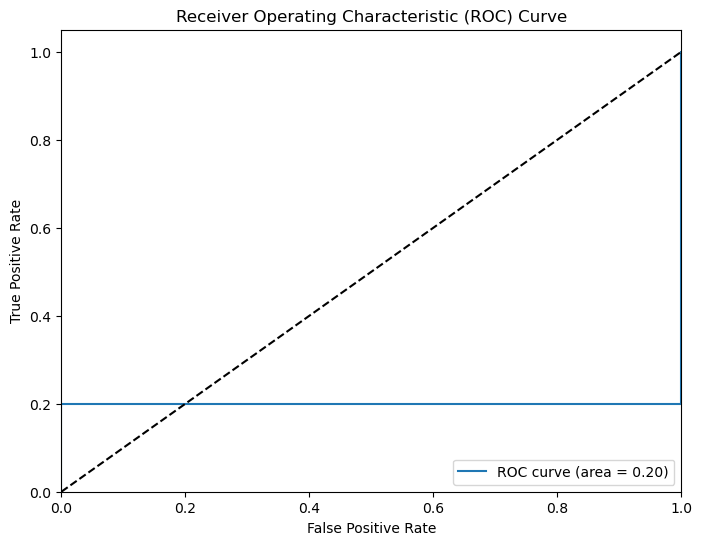

In [55]:
#Plot the ROC curve and calculate the AUC value.
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
#Interpret the coefficients of the logistic regression model.

# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Display coefficients and intercept
print('Intercept:', intercept)
print('Coefficients:')
for feature, coef in zip(range(1, len(coefficients) + 1), coefficients):
    print(f'Feature {feature}: {coef}')

# Interpretation
print("\nInterpretation:")
print("For each one-unit increase in a feature:")
for feature, coef in zip(range(1, len(coefficients) + 1), coefficients):
    print(f"Feature {feature}: {np.exp(coef):.4f} times increase in odds")

# Make predictions
y_pred = model.predict(x_test)

# Evaluate model performance
#print('Accuracy: ', accuracy_score(y_test, y_pred))

Intercept: -0.008283440679515601
Coefficients:
Feature 1: -0.1092060720062933
Feature 2: -0.9552936967507742
Feature 3: -0.37831576783759074
Feature 4: 0.044363165958864595
Feature 5: 0.009518536530336456
Feature 6: -0.13399909359919943
Feature 7: 0.09342932457810499
Feature 8: 0.01220257135560906
Feature 9: 0.10183587314186508
Feature 10: -0.32845317564303633
Feature 11: -0.8720188749741588
Feature 12: 0.5730846124979915
Feature 13: -0.07739538558517835

Interpretation:
For each one-unit increase in a feature:
Feature 1: 0.8965 times increase in odds
Feature 2: 0.3847 times increase in odds
Feature 3: 0.6850 times increase in odds
Feature 4: 1.0454 times increase in odds
Feature 5: 1.0096 times increase in odds
Feature 6: 0.8746 times increase in odds
Feature 7: 1.0979 times increase in odds
Feature 8: 1.0123 times increase in odds
Feature 9: 1.1072 times increase in odds
Feature 10: 0.7200 times increase in odds
Feature 11: 0.4181 times increase in odds
Feature 12: 1.7737 times incre

In [58]:
#Calculate the odds ratios for the features and explain what they imply about the likelihood of having heart disease.

# Calculate odds ratios and interpret
odds_ratios = np.exp(coefficients)
print('\nOdds Ratios:')
for feature, odds_ratio in zip(range(1, len(odds_ratios) + 1), odds_ratios):
    print(f'Feature {feature}: {odds_ratio:.4f}')

# Interpretation
print("\nInterpretation:")
print("For each one-unit increase in a feature, the odds of having heart disease change by the corresponding odds ratio.")


Odds Ratios:
Feature 1: 0.8965
Feature 2: 0.3847
Feature 3: 0.6850
Feature 4: 1.0454
Feature 5: 1.0096
Feature 6: 0.8746
Feature 7: 1.0979
Feature 8: 1.0123
Feature 9: 1.1072
Feature 10: 0.7200
Feature 11: 0.4181
Feature 12: 1.7737
Feature 13: 0.9255

Interpretation:
For each one-unit increase in a feature, the odds of having heart disease change by the corresponding odds ratio.
